In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score
from sklearn.svm import SVC
from sklearn.model_selection import KFold

In [41]:
data = pd.read_csv("data/league_data_cleaned.csv")

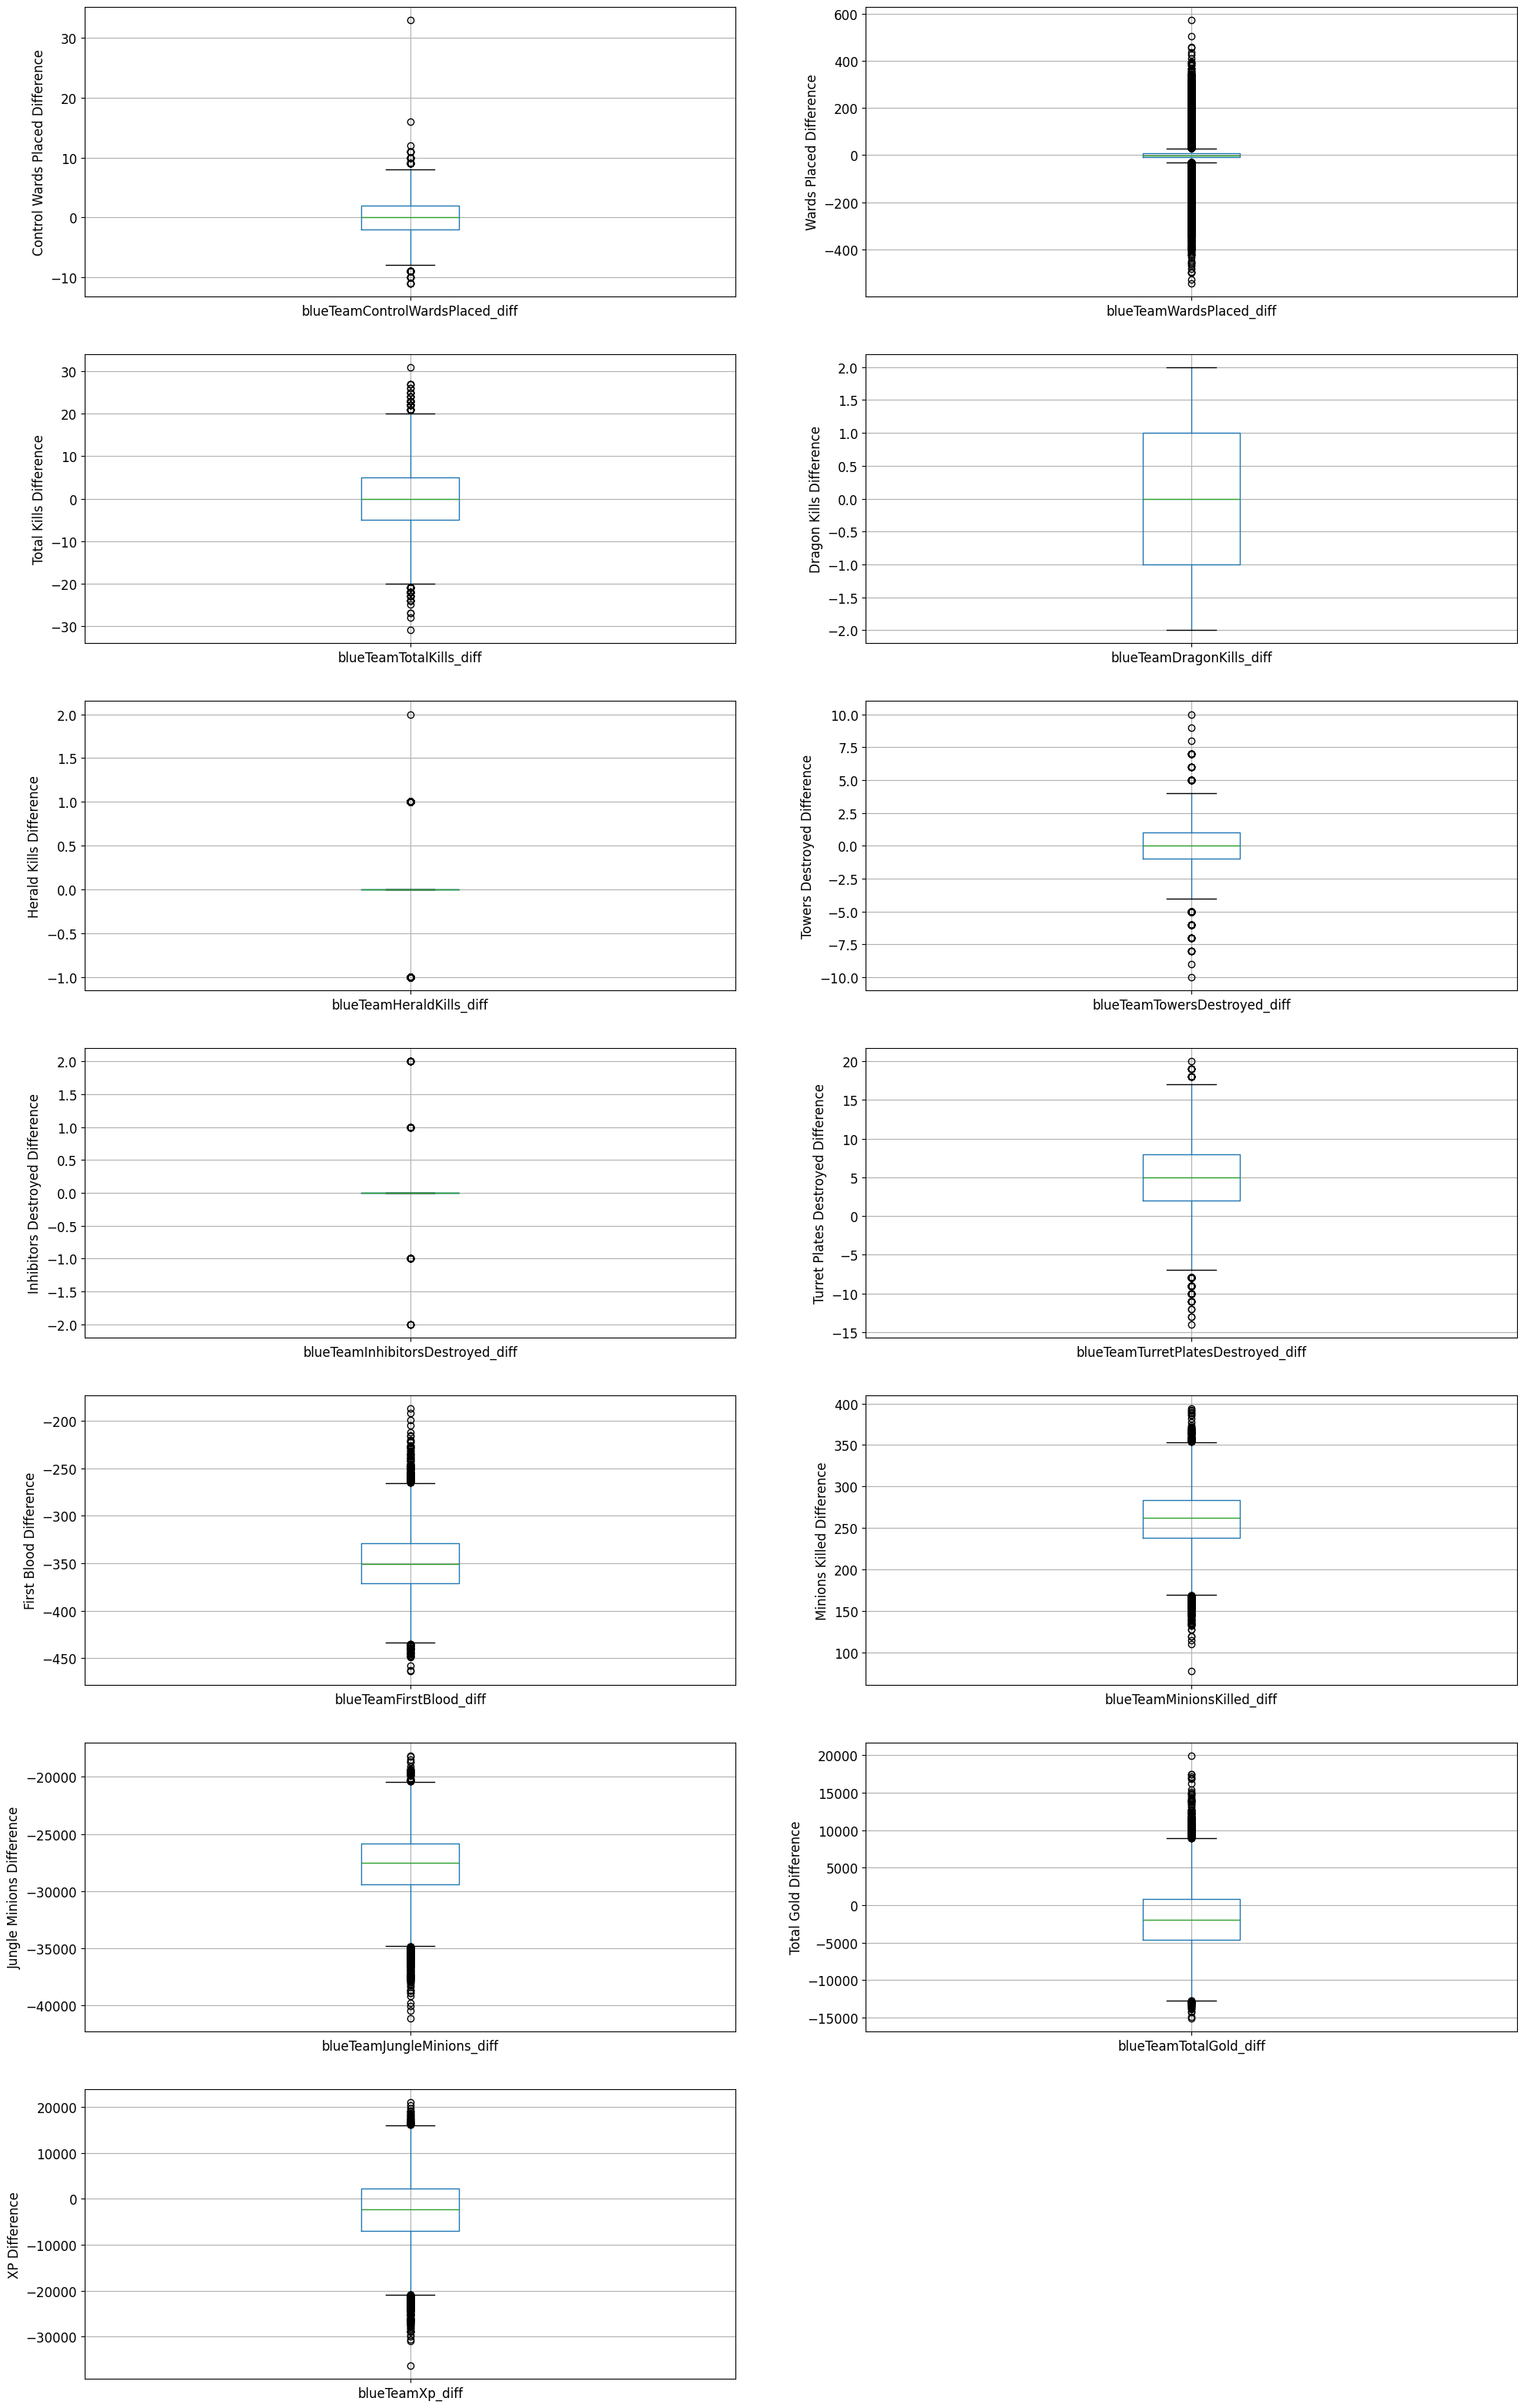

In [42]:
plt.figure(figsize=(24,40))


plt.subplot(7,2,1)
fig = data.boxplot(column = 'blueTeamControlWardsPlaced_diff')
fig.set_title('')
fig.set_ylabel('Control Wards Placed Difference')

plt.subplot(7,2,2)
fig = data.boxplot(column = 'blueTeamWardsPlaced_diff')
fig.set_title('')
fig.set_ylabel('Wards Placed Difference')

plt.subplot(7,2,3)
fig = data.boxplot(column = 'blueTeamTotalKills_diff')
fig.set_title('')
fig.set_ylabel('Total Kills Difference')

plt.subplot(7,2,4)
fig = data.boxplot(column = 'blueTeamDragonKills_diff')
fig.set_title('')
fig.set_ylabel('Dragon Kills Difference')

plt.subplot(7,2,5)
fig = data.boxplot(column = 'blueTeamHeraldKills_diff')
fig.set_title('')
fig.set_ylabel('Herald Kills Difference')

plt.subplot(7,2,6)
fig = data.boxplot(column = 'blueTeamTowersDestroyed_diff')
fig.set_title('')
fig.set_ylabel('Towers Destroyed Difference')

plt.subplot(7,2,7)
fig = data.boxplot(column = 'blueTeamInhibitorsDestroyed_diff')
fig.set_title('')
fig.set_ylabel('Inhibitors Destroyed Difference')

plt.subplot(7,2,8)
fig = data.boxplot(column = 'blueTeamTurretPlatesDestroyed_diff')
fig.set_title('')
fig.set_ylabel('Turret Plates Destroyed Difference')


plt.subplot(7,2,9)
fig = data.boxplot(column = 'blueTeamFirstBlood_diff')
fig.set_title('')
fig.set_ylabel('First Blood Difference')

plt.subplot(7,2,10)
fig = data.boxplot(column = 'blueTeamMinionsKilled_diff')
fig.set_title('')
fig.set_ylabel('Minions Killed Difference')

plt.subplot(7,2,11)
fig = data.boxplot(column = 'blueTeamJungleMinions_diff')
fig.set_title('')
fig.set_ylabel('Jungle Minions Difference')

plt.subplot(7,2,12)
fig = data.boxplot(column = 'blueTeamTotalGold_diff')
fig.set_title('')
fig.set_ylabel('Total Gold Difference')

plt.subplot(7,2,13)
fig = data.boxplot(column = 'blueTeamXp_diff')
fig.set_title('')
fig.set_ylabel('XP Difference')

plt.show()

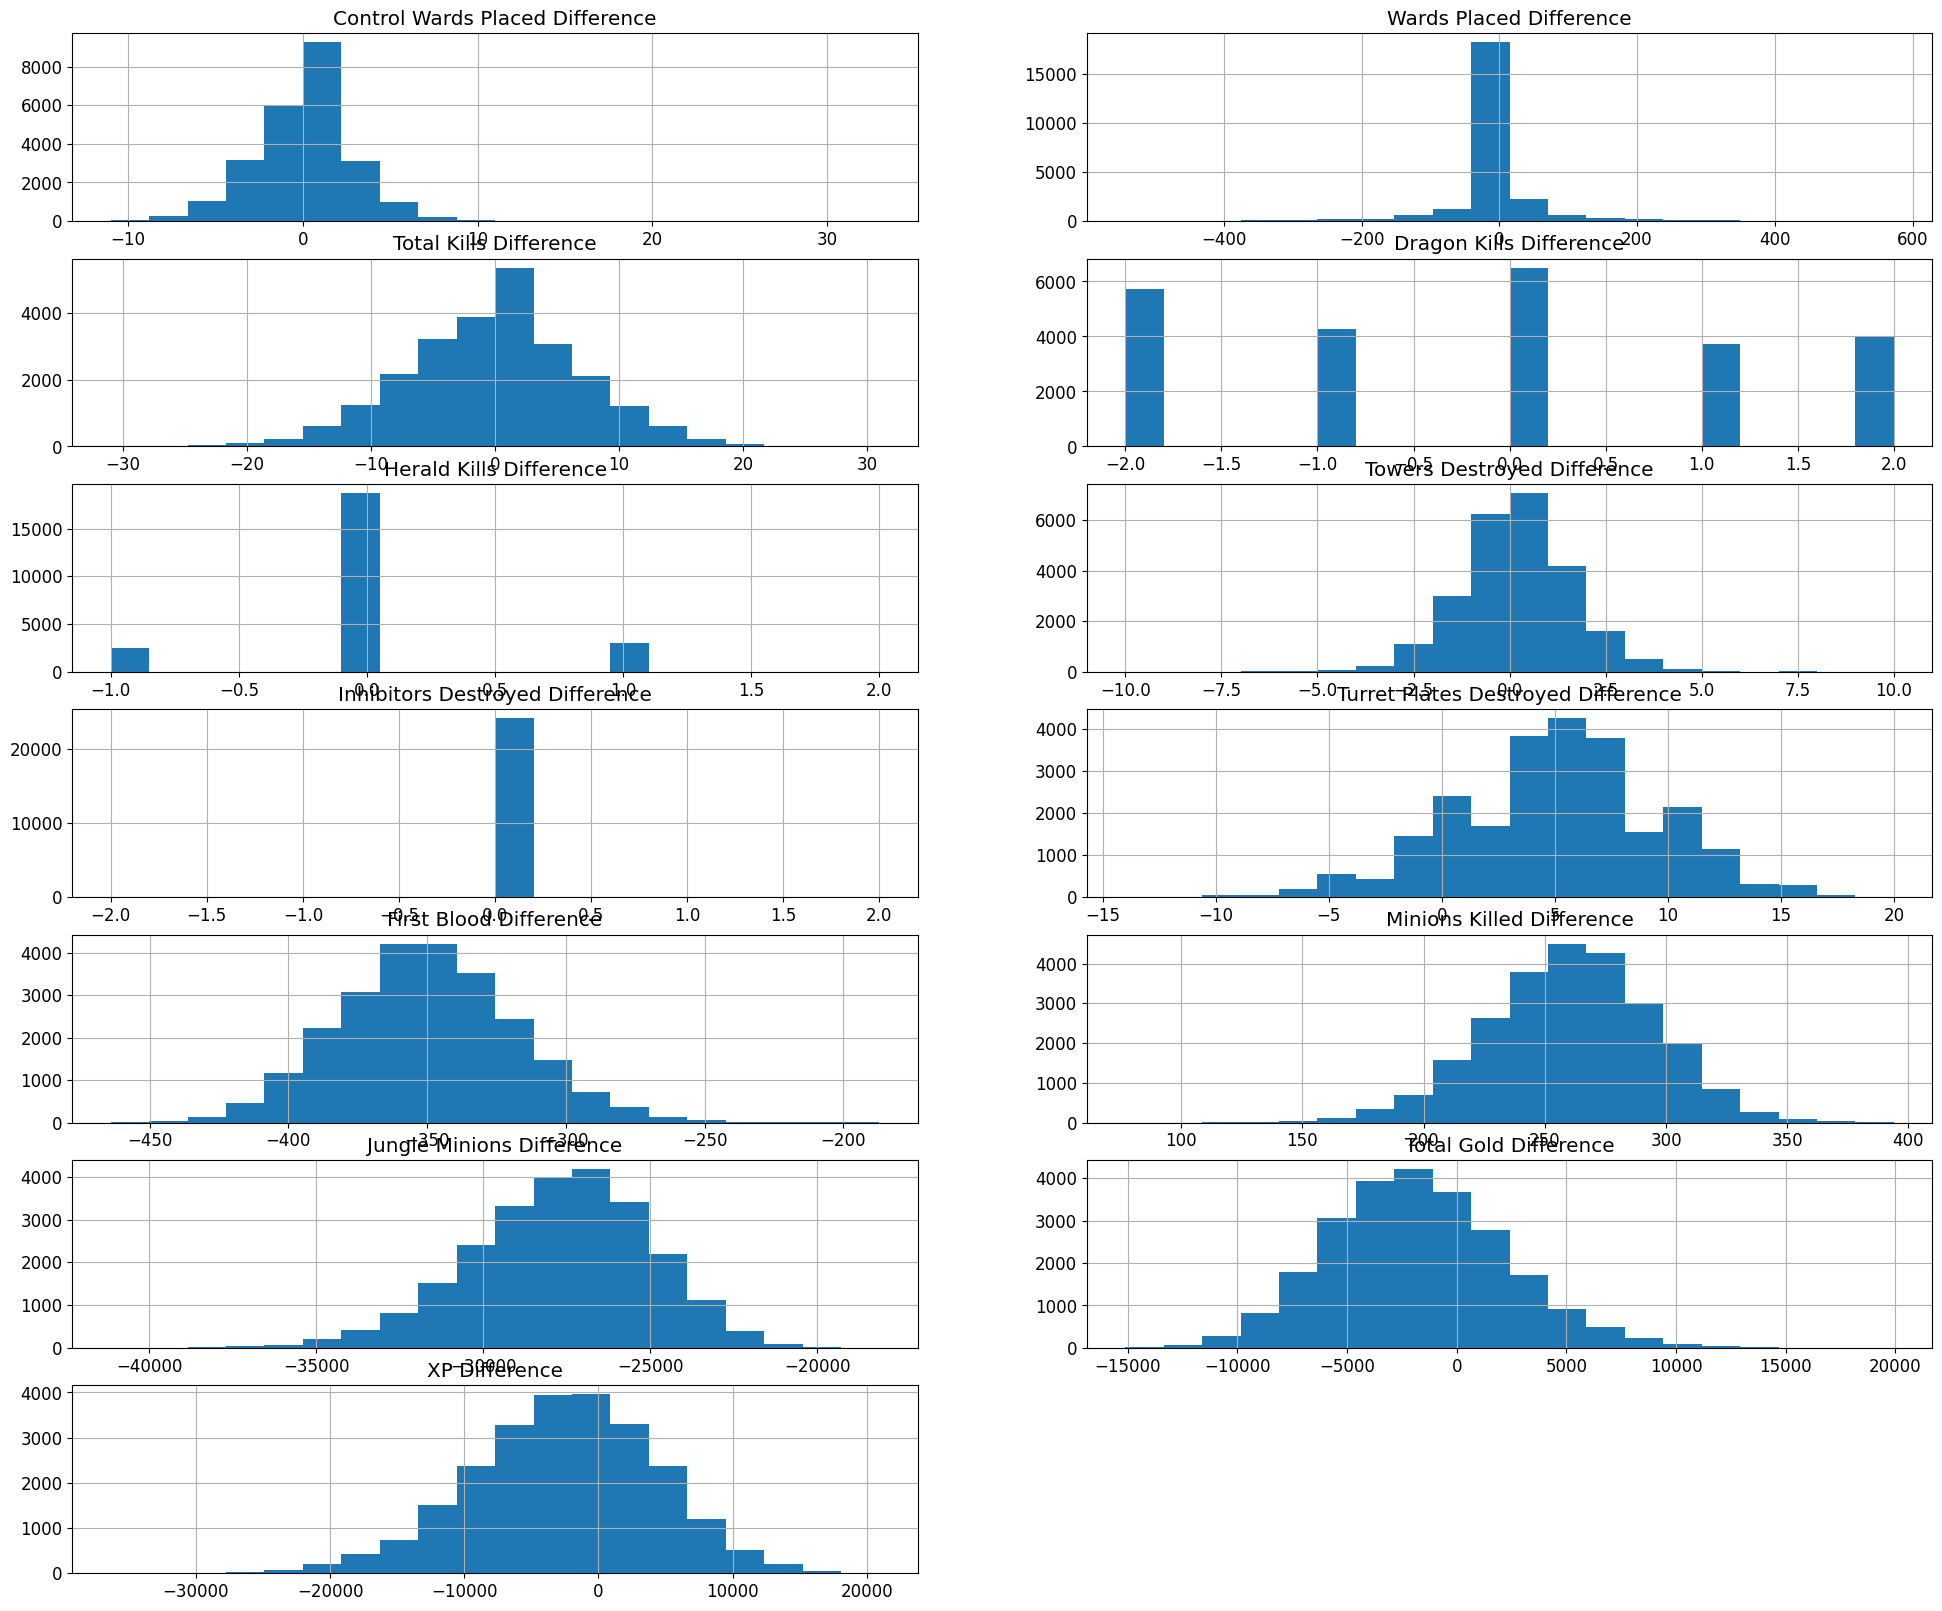

In [43]:
plt.figure(figsize=(24, 20))

plt.subplot(7,2,1)
fig = data['blueTeamControlWardsPlaced_diff'].hist(bins=20)
fig.set_title('Control Wards Placed Difference')

plt.subplot(7,2,2)
fig = data['blueTeamWardsPlaced_diff'].hist(bins=20)
fig.set_title('Wards Placed Difference')

plt.subplot(7,2,3)
fig = data['blueTeamTotalKills_diff'].hist(bins=20)
fig.set_title('Total Kills Difference')

plt.subplot(7,2,4)
fig = data['blueTeamDragonKills_diff'].hist(bins=20)
fig.set_title('Dragon Kills Difference')

plt.subplot(7,2,5)
fig = data['blueTeamHeraldKills_diff'].hist(bins=20)
fig.set_title('Herald Kills Difference')

plt.subplot(7,2,6)
fig = data['blueTeamTowersDestroyed_diff'].hist(bins=20)
fig.set_title('Towers Destroyed Difference')

plt.subplot(7,2,7)
fig = data['blueTeamInhibitorsDestroyed_diff'].hist(bins=20)
fig.set_title('Inhibitors Destroyed Difference')

plt.subplot(7,2,8)
fig = data['blueTeamTurretPlatesDestroyed_diff'].hist(bins=20)
fig.set_title('Turret Plates Destroyed Difference')

plt.subplot(7,2,9)
fig = data['blueTeamFirstBlood_diff'].hist(bins=20)
fig.set_title('First Blood Difference')

plt.subplot(7,2,10)
fig = data['blueTeamMinionsKilled_diff'].hist(bins=20)
fig.set_title('Minions Killed Difference')

plt.subplot(7,2,11)
fig = data['blueTeamJungleMinions_diff'].hist(bins=20)
fig.set_title('Jungle Minions Difference')

plt.subplot(7,2,12)
fig = data['blueTeamTotalGold_diff'].hist(bins=20)
fig.set_title('Total Gold Difference')

plt.subplot(7,2,13)
fig = data['blueTeamXp_diff'].hist(bins=20)
fig.set_title('XP Difference')

plt.show()

In [44]:
X = data.drop(['matchId', 'blueWin'], axis=1)  
y = data['blueWin']

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [46]:
X_test.shape, X_train.shape

((4844, 13), (19374, 13))

In [47]:
cols = X_train.columns

In [48]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [49]:
X_train = pd.DataFrame(X_train, columns=[cols])
X_test = pd.DataFrame(X_test, columns=[cols])

In [50]:
X_train.describe()

,blueTeamControlWardsPlaced_diff,blueTeamWardsPlaced_diff,blueTeamTotalKills_diff,blueTeamDragonKills_diff,blueTeamHeraldKills_diff,blueTeamTowersDestroyed_diff,blueTeamInhibitorsDestroyed_diff,blueTeamTurretPlatesDestroyed_diff,blueTeamFirstBlood_diff,blueTeamMinionsKilled_diff,blueTeamJungleMinions_diff,blueTeamTotalGold_diff,blueTeamXp_diff
count,1.937400e+04,1.937400e+04,1.937400e+04,1.937400e+04,1.937400e+04,1.937400e+04,1.937400e+04,1.937400e+04,1.937400e+04,1.937400e+04,1.937400e+04,1.937400e+04,1.937400e+04
mean,1.026902e-17,-2.934005e-18,-1.026902e-17,4.034257e-17,-1.714559e-17,1.283627e-17,4.034257e-18,4.896121e-17,1.188272e-16,-2.310529e-16,4.919960e-16,5.097834e-17,6.234761e-18
std,1.000026e+00,1.000026e+00,1.000026e+00,1.000026e+00,1.000026e+00,1.000026e+00,1.000026e+00,1.000026e+00,1.000026e+00,1.000026e+00,1.000026e+00,1.000026e+00,1.000026e+00
min,-3.856036e+00,-8.424192e+00,-4.350706e+00,-1.322928e+00,-2.137158e+00,-6.644426e+00,-2.842583e+01,-4.186760e+00,-3.604519e+00,-4.398319e+00,-4.998327e+00,-3.297025e+00,-4.137491e+00
25%,-6.931722e-01,-9.079346e-02,-6.948972e-01,-5.991508e-01,-3.930630e-02,-4.833042e-01,-1.173288e-02,-6.649613e-01,-6.658145e-01,-6.319856e-01,-6.384767e-01,-6.972676e-01,-6.489546e-01
50%,9.686344e-03,1.824166e-02,8.142986e-03,1.246269e-01,-3.930630e-02,2.012649e-01,-1.173288e-02,-4.624020e-03,-3.383507e-02,1.033492e-02,5.579423e-02,-4.251532e-02,3.683981e-02
75%,7.125449e-01,1.428532e-01,7.111831e-01,8.484046e-01,-3.930630e-02,8.858339e-01,-1.173288e-02,6.557133e-01,6.613423e-01,6.818518e-01,7.014160e-01,6.355126e-01,6.963064e-01
max,1.160685e+01,7.884347e+00,3.804560e+00,1.572182e+00,4.156398e+00,7.046955e+00,2.840237e+01,3.076950e+00,5.148396e+00,3.893454e+00,3.552030e+00,5.379108e+00,3.417265e+00


We start by running SVM with default hyperparameters C=1.0, kernel = 'rbf', and gamma = 'auto'.

In [51]:
svc = SVC()

svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)

print('Accuracy: ', accuracy_score(y_test, y_pred))

Accuracy:  0.7508257638315442


Now we run SVM with linear kernel and C=1.0. We obtain a similar accuracy score.

In [52]:
linear_svc = SVC(kernel = 'linear', C=1.0)

linear_svc.fit(X_train, y_train)

y_pred_test = linear_svc.predict(X_test)

print('Accuracy with linear kernel and C=1.0: ', accuracy_score(y_test, y_pred_test))

Accuracy with linear kernel and C=1.0:  0.7533030553261767


Now we compare the train-set and test-set accuracy for overfitting.

In [53]:
y_pred_train = linear_svc.predict(X_train)
y_pred_train

array([1, 0, 1, ..., 0, 0, 0])

In [54]:
print('Trainig-set accuracy score: ', accuracy_score(y_train, y_pred_train))

Trainig-set accuracy score:  0.7604005368018995


Both values are very close to each other so there is no question of overfitting.

In [55]:
print('Training set score: ', linear_svc.score(X_train, y_train)) 
print('Test set score: ', linear_svc.score(X_test, y_test))

Training set score:  0.7604005368018995
Test set score:  0.7533030553261767


The model accuracy is 76%, but we can't say it is good enough without comparing it with the null accuracy. It's the accuracy that could be achieved by always predicting the most frequent class.

We start by checking the class distribution in the test set.

In [56]:
y_test.value_counts()

blueWin
0    2463
1    2381
Name: count, dtype: int64

The most frequent class 0 has 2463 occurences. So we can calculate null accuracy by dividing 2463 by total number of occurences.

In [57]:
null_accuracy = (2463/(2463+2381))
print('Null accuracy score:', null_accuracy)

Null accuracy score: 0.5084640792733278


Null accuracy score is 0.76 but null accuracy is 0.50. We can conclude that our SVM classifier is doing a very good job at predicting the class labels.

## SVM: Polynomial kernel

In [58]:
poly_svc = SVC(kernel = 'poly', C=1.0)

poly_svc.fit(X_train, y_train)

y_pred=poly_svc.predict(X_test)

print('Accuracy with polynomial kernel and C=1.0: ', accuracy_score(y_test, y_pred))

Accuracy with polynomial kernel and C=1.0:  0.7526837324525186


In [59]:
poly_svc = SVC(kernel = 'poly', C=100.0)

poly_svc.fit(X_train, y_train)

y_pred=poly_svc.predict(X_test)

print('Accuracy with polynomial kernel and C=100.0: ', accuracy_score(y_test, y_pred))

Accuracy with polynomial kernel and C=100.0:  0.7520644095788604


The polynomial kernel is as accurate as the polynomial kernel, but the results are very similar, there ins't much of a difference.

## SVM: Sigmoid kernel

In [60]:
sigmoid_svc = SVC(kernel='sigmoid', C=1.0)

sigmoid_svc.fit(X_train, y_train)

y_pred = sigmoid_svc.predict(X_test)

print('Accuracy with sigmoid kernel and C=1.0: ', accuracy_score(y_test, y_pred))

Accuracy with sigmoid kernel and C=1.0:  0.6676300578034682


In [61]:
sigmoid_svc = SVC(kernel='sigmoid', C=100.0)

sigmoid_svc.fit(X_train, y_train)

y_pred = sigmoid_svc.predict(X_test)

print('Accuracy with sigmoid kernel and C=100.0: ', accuracy_score(y_test, y_pred))

Accuracy with sigmoid kernel and C=100.0:  0.6676300578034682


The sigmoid kernel on the other hand is getting a worse performance than the sigmoid kernel and the sigmoid kernel, with an accuracy of 0.66. It may be overfitting the training set.

## SVM: Confusion Matrix

In [62]:
cm = confusion_matrix(y_test, y_pred_test)

print('Confusion Matrix: \n', cm)
print('\nTrue Positives: ', cm[0,0])
print('\nTrue Negatives: ', cm[1,1])
print('\nFalse Positives: ', cm[0,1])
print('\nFalse Negatives: ', cm[1,0])

Confusion Matrix: 
 [[1868  595]
 [ 600 1781]]

True Positives:  1868

True Negatives:  1781

False Positives:  595

False Negatives:  600


The confusion matrix shows 1868 (TP) + 1781 (TN) are correct predictions and 595 (FP) + 600 (FN) are incorrect predictions.

<Axes: >

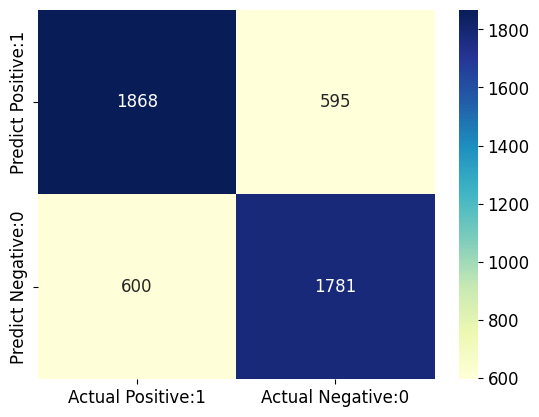

In [63]:
cm_matrix = pd.DataFrame(data=cm, columns = ['Actual Positive:1', 'Actual Negative:0'], index=['Predict Positive:1', 'Predict Negative:0'])
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

## Classification metrices

Classification report is a way of evaluating the classification model performance (precision, recall, f1 and support).

In [64]:
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.76      0.76      0.76      2463
           1       0.75      0.75      0.75      2381

    accuracy                           0.75      4844
   macro avg       0.75      0.75      0.75      4844
weighted avg       0.75      0.75      0.75      4844



In [65]:
TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

In [66]:
classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)
print('Classification accuracy: ', classification_accuracy)

Classification accuracy:  0.7533030553261767


In [67]:
classification_error = (FP + FN) / float(TP + TN + FP + FN)
print('Classification error: ', classification_error)

Classification error:  0.24669694467382328


In [68]:
precision = TP / float(TP + FP)
print('Precision: ', precision)

Precision:  0.7584246853430775


In [69]:
recall = TP / float(TP + FN)
print('Recall: ', recall)

Recall:  0.7568881685575365


In [70]:
true_positive_rate = TP / float(TP + FN)
print('True Positive Rate: ', true_positive_rate)

false_positive_rate = FP / float(FP + TN)
print('False Positive Rate: ', false_positive_rate)

True Positive Rate:  0.7568881685575365
False Positive Rate:  0.25042087542087543


In [71]:
specificity = TN / (TN + FP)
print('Specificity: ', specificity)

Specificity:  0.7495791245791246


## ROC - AUC

Receiver Operating Characteristic Curve is a plot which shows the performance of a classfication model at various classification thresholds levels by plotting the True Positive Rate against the False Positive Rate at each threshold.

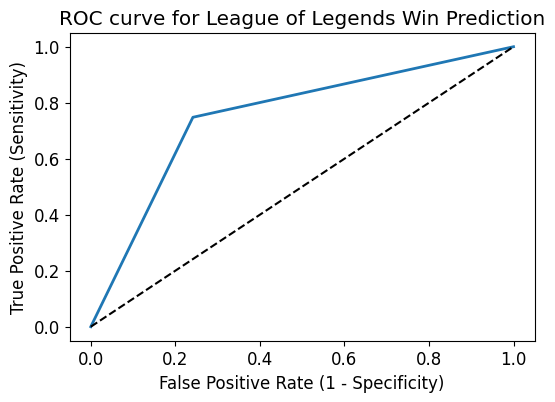

In [72]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_test)

plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, linewidth=2)
plt.plot([0,1], [0,1], 'k--')
plt.rcParams['font.size'] = 12
plt.title('ROC curve for League of Legends Win Prediction')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.show()

ROC AUC (Area Under Curve) compares classifier performance by measuring the area under the curve. A perfect classifer will be equal to 1, and a purely random classifier will be equal to 0.5.

In [73]:
ROC_AUC = roc_auc_score(y_test, y_pred_test)
print('ROC AUC: ', ROC_AUC)

ROC AUC:  0.7532148626211398


In [74]:
Cross_validated_ROC_AUC = cross_val_score(linear_svc, X_train, y_train, cv=20, scoring='roc_auc').mean()
print('Cross-validated ROC AUC: ', Cross_validated_ROC_AUC)

Cross-validated ROC AUC:  0.8429933654497799


## Stratified k-fold Cross Validation with shuffle split

Startified k-fold crossvalidation is used to evaluate model performace when the dataset is imbalanced. We split the data such that the proportions between classes are the same in each fold as they are in the whole dataset.

In [75]:
kfold = KFold(n_splits=5, random_state=0, shuffle=True)

linear_svc = SVC(kernel='linear')
linear_scores = cross_val_score(linear_svc, X_train, y_train, cv=kfold)

print('Cross-validated scores with linear kernel: ', linear_scores)

Cross-validated scores with linear kernel:  [0.75509677 0.75535484 0.76180645 0.76877419 0.75193598]


In [76]:
print('Average cross-validated score with linear kernel: ', linear_scores.mean())

Average cross-validated score with linear kernel:  0.7585936483088248


In [77]:
rbf_svc = SVC(kernel='rbf')
rbf_scores = cross_val_score(rbf_svc, X, y, cv=kfold)

print('Stratified cross-validated scores with rbf kernel: ', rbf_scores)

Stratified cross-validated scores with rbf kernel:  [0.74607762 0.7510322  0.74752271 0.75428453 0.75428453]


In [78]:
print('Average stratified cross-validated score with rbf kernel: ', rbf_scores.mean())

Average stratified cross-validated score with rbf kernel:  0.7506403207707993


We obtain a higher average cross-validated score with rbf kernel of 0.75, which is lower than the accuracy score, so it does not help improve the model performance.